In [17]:
# importing the necessary libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Importing Data
Retrieving data from the necessary wikipedia page. Next we have to see the tables which are included and choose the one we need

In [11]:
# importing data from wikipedia
url="https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France"
req=requests.get(url)
data = pd.read_html(req.text)
print(f"Number of tables found: {len(data)}")
for i, table in enumerate(data):
    print(f"\nTable {i}:")
    print(table.head(3))  # show first 3 rows 

Number of tables found: 8

Table 0:
   0                                                  1
0  †  This implies the highest-grossing movie of the...

Table 1:
   #              Date                            Film         Gross Notes
0  1   January 7, 2018        Star Wars: The Last Jedi  US$6,557,062   [1]
1  2  January 14, 2018  Jumanji: Welcome to the Jungle  US$2,127,871   [2]
2  3  January 21, 2018                  Brillantissime  US$2,006,033   [3]

Table 2:
  vteLists of box office number-one films  \
0                                Americas   
1                               Argentina   
2                                  Brazil   

           vteLists of box office number-one films.1  
0  Argentina 2003 2016 2017 2018 2019 2020 2021 2...  
1  2003 2016 2017 2018 2019 2020 2021 2022 2023 2...  
2  2007 2008 2009 2010 2016 2017 2018 2019 2020 2...  

Table 3:
           0                                                  1
0  Argentina  2003 2016 2017 2018 2019 2020 2021 2022 202

/var/folders/cr/f851nq8d2x1760kd65n74rqc0000gn/T/ipykernel_5019/3255531513.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(req.text)


In [12]:
df = data[1]
df.head()

,#,Date,Film,Gross,Notes
0,1,"January 7, 2018",Star Wars: The Last Jedi,"US$6,557,062",[1]
1,2,"January 14, 2018",Jumanji: Welcome to the Jungle,"US$2,127,871",[2]
2,3,"January 21, 2018",Brillantissime,"US$2,006,033",[3]
3,4,"January 28, 2018",The Post,"US$2,771,269",[4]
4,5,"February 4, 2018",Les Tuche 3,"US$16,604,101",[5]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     object
 4   Notes   50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [16]:
# removing the 'US$' from the Gross feature
df['Gross'] = df['Gross'].astype('str') # ensuring everything is string
df['Gross'] = df['Gross'].str.replace(r"US\$", "", regex=True)
# removing all non-digits
df['Gross'] = df['Gross'].str.replace(r"[^\d]", "", regex=True)
# changing the dtype of Gross to int64
df['Gross'] = df['Gross'].astype('int64')
# visualizing the changes
df['Gross'].head(10)

0     6557062
1     2127871
2     2006033
3     2771269
4    16604101
5     8753427
6     7627163
7     5637555
8    16739183
9     9546133
Name: Gross, dtype: int64

In [19]:
# changing date to datetime to extract months
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Month'].head(5)

0    1
1    1
2    1
3    1
4    2
Name: Month, dtype: int32

In [20]:
# dropping unnecessary columns
df.drop(['#', 'Notes'], axis=1, inplace=True)

In [21]:
df.head()

,Date,Film,Gross,Month
0,2018-01-07,Star Wars: The Last Jedi,6557062,1
1,2018-01-14,Jumanji: Welcome to the Jungle,2127871,1
2,2018-01-21,Brillantissime,2006033,1
3,2018-01-28,The Post,2771269,1
4,2018-02-04,Les Tuche 3,16604101,2


In [22]:
df.duplicated().sum()

0

In [23]:
df.describe()

,Date,Gross,Month
count,50,5.000000e+01,50.000000
mean,2018-06-27 12:00:00,6.071005e+06,6.400000
min,2018-01-07 00:00:00,1.414632e+06,1.000000
25%,2018-04-02 18:00:00,3.090546e+06,4.000000
50%,2018-06-27 12:00:00,5.153978e+06,6.500000
75%,2018-09-21 06:00:00,8.051876e+06,9.000000
max,2018-12-16 00:00:00,1.764530e+07,12.000000
std,NaN,3.810280e+06,3.362458


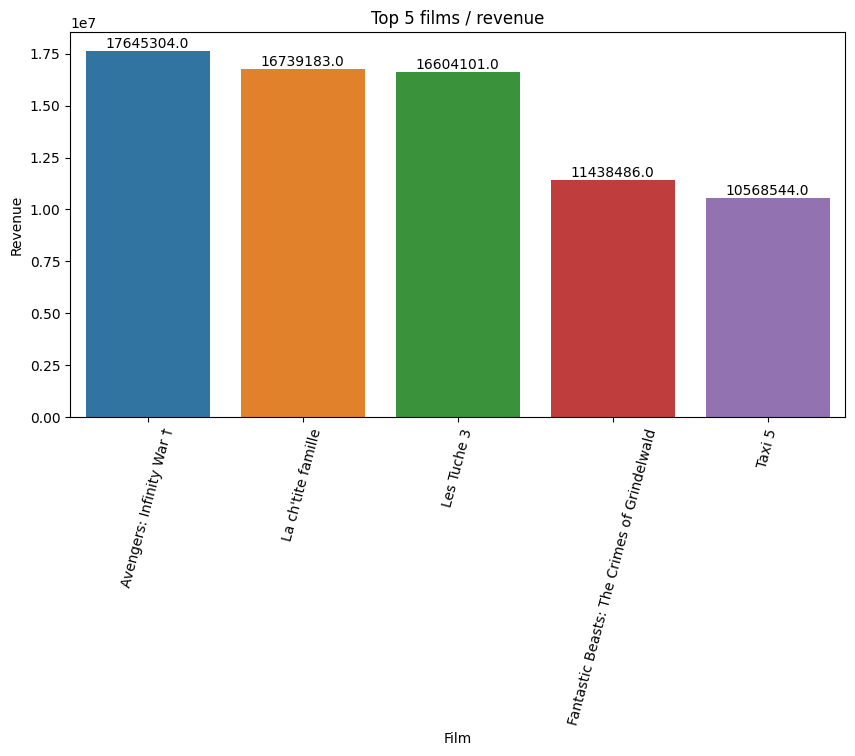

In [25]:
# creating a new df for plotting
new_df = df[['Film', 'Gross']].sort_values(ascending=False,by='Gross')
plt.figure(figsize=(10,5))
brplot = sns.barplot(x='Film', y='Gross', data=new_df.head(5))
brplot.set_xticklabels(labels=new_df.head()['Film'], rotation=75)
brplot.set_title("Top 5 films / revenue")
brplot.set_ylabel("Revenue")
for p in brplot.patches:
    brplot.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')

<Axes: ylabel='Gross'>

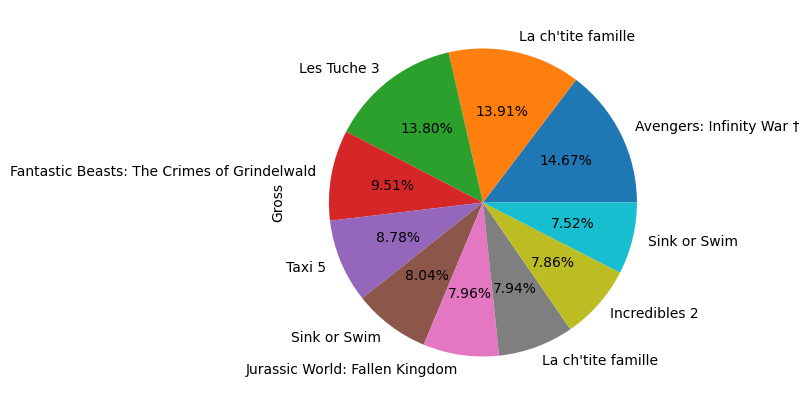

In [26]:
new_df['Gross'].head(10).plot(kind='pie', autopct='%.2f%%', labels=new_df['Film'], figsize=(10, 5))

<Axes: xlabel='Month'>

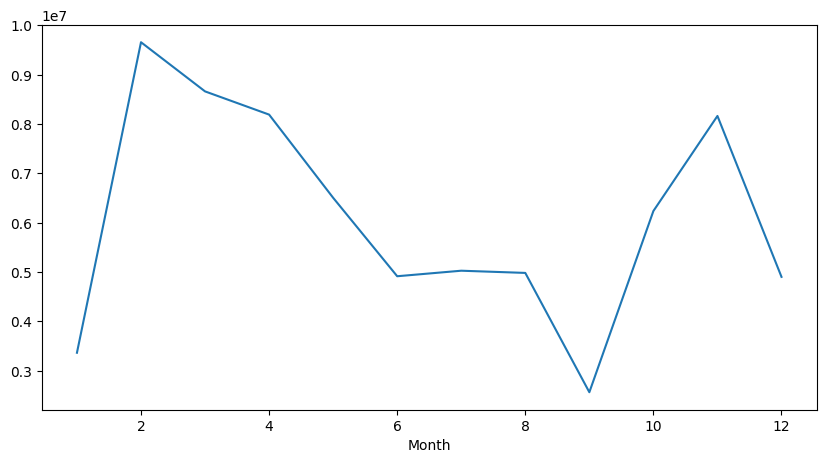

In [27]:
# collecting the average of each month
new_df_2 = df.groupby('Month')['Gross'].mean()
new_df_2.plot(kind='line', figsize=(10,5))